In [113]:
#author 
"shreyas raja created @time using LSTM - Sequence modelling"
import numpy as np
import pandas as pd #to load the data 
import matplotlib as mpl # to plot figures 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split #to split the data into training and testing   
from keras.preprocessing.sequence import TimeseriesGenerator # data processing for time series generator 
from sklearn.preprocessing import MinMaxScaler, StandardScaler 
from keras import metrics 
import tensorflow as tf # to describe the architecture of the neural networks 
import seaborn as sns
import glob, os

mpl.rcParams['figure.figsize'] = (12,8)
mpl.rcParams['axes.grid'] = False

In [656]:
df=pd.read_csv('Guld_data_Raw.csv')
#df1 = df1.fillna(method='ffill')
df= df.interpolate('linear')
df
#df=df.loc[25:2181,:]
#df=df.dropna(subset[]inplace=True)
df


,date,R_H,Precipitation,ET,GW1428A,GW1430,GW285,HK4003U,HK4004U,HK4012H,...,HK4256U,HK4258U,HK4262U,HK4302H,SGU903074482,SGU909128423,SGU912799781,SGU912799806,SGU912799815,SGU912799853
0,7/12/2014,57.0,3.7,2.311069292,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7/13/2014,80.0,5.5,1.003075371,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7/14/2014,90.0,0.0,1.536110847,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7/15/2014,77.0,2.8,1.378046148,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7/16/2014,76.0,0.0,2.217789322,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2176,6/26/2020,72.0,1.0,2.041946536,44.29,16.740000,47.717958,17.984468,19.374400,21.992149,...,22.294167,17.905417,17.658750,19.06843,22.398251,19.813529,22.525714,24.95,21.69,22.59
2177,6/27/2020,73.0,6.5,2.279865846,44.29,16.746667,47.717958,17.982979,19.362083,21.992149,...,22.328750,17.969167,17.725417,19.06843,22.439857,19.812353,22.607143,24.95,21.69,22.59
2178,6/28/2020,82.0,2.5,1.222634836,44.29,16.753333,47.717958,17.981489,19.596667,21.992149,...,22.329583,18.062083,17.812083,19.06843,22.481462,19.811176,22.688571,24.95,21.69,22.59
2179,6/29/2020,70.0,5.5,1.80884821,44.29,16.760000,47.717958,17.980000,19.615417,21.992149,...,22.329583,18.125417,17.891667,19.06843,22.523068,19.810000,22.770000,24.95,21.69,22.59


In [657]:
df=df.interpolate('linear')
df=df.fillna({'ET':0})
df=df.loc[25:2181,:]
df

,date,R_H,Precipitation,ET,GW1428A,GW1430,GW285,HK4003U,HK4004U,HK4012H,...,HK4256U,HK4258U,HK4262U,HK4302H,SGU903074482,SGU909128423,SGU912799781,SGU912799806,SGU912799815,SGU912799853
25,8/6/2014,73.0,0.0,2.336221776,NaN,16.500000,NaN,17.750000,19.440000,26.957008,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,8/7/2014,84.0,9.5,2.145559378,NaN,16.509821,NaN,17.754000,19.445333,26.966667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,8/8/2014,83.0,0.0,2.212505461,NaN,16.519643,NaN,17.758000,19.450667,26.976326,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,8/9/2014,87.0,7.1,2.045351729,NaN,16.529464,NaN,17.762000,19.456000,26.985985,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,8/10/2014,76.0,18.4,2.539132229,NaN,16.539286,NaN,17.766000,19.461333,26.995645,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2176,6/26/2020,72.0,1.0,2.041946536,44.29,16.740000,47.717958,17.984468,19.374400,21.992149,...,22.294167,17.905417,17.658750,19.06843,22.398251,19.813529,22.525714,24.95,21.69,22.59
2177,6/27/2020,73.0,6.5,2.279865846,44.29,16.746667,47.717958,17.982979,19.362083,21.992149,...,22.328750,17.969167,17.725417,19.06843,22.439857,19.812353,22.607143,24.95,21.69,22.59
2178,6/28/2020,82.0,2.5,1.222634836,44.29,16.753333,47.717958,17.981489,19.596667,21.992149,...,22.329583,18.062083,17.812083,19.06843,22.481462,19.811176,22.688571,24.95,21.69,22.59
2179,6/29/2020,70.0,5.5,1.80884821,44.29,16.760000,47.717958,17.980000,19.615417,21.992149,...,22.329583,18.125417,17.891667,19.06843,22.523068,19.810000,22.770000,24.95,21.69,22.59


In [669]:
df=df.fillna({'ET':0})
df.isnull().sum()


date                0
R_H                 0
Precipitation       0
ET                  0
GW1428A           112
GW1430              0
GW285             224
HK4003U             0
HK4004U             0
HK4012H             0
HK4013H             0
HK4014H             0
HK4101U             0
HK4102U             0
HK4115U           120
HK4206U           547
HK4226B           852
HK4256U          1230
HK4258U          1190
HK4262U          1191
HK4302H          1651
SGU903074482      847
SGU909128423      971
SGU912799781     1211
SGU912799806     1189
SGU912799815     1189
SGU912799853     1211
dtype: int64

In [663]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2156 entries, 25 to 2180
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           2156 non-null   datetime64[ns]
 1   R_H            2156 non-null   float64       
 2   Precipitation  2156 non-null   float64       
 3   ET             2155 non-null   float64       
 4   GW1428A        2044 non-null   float64       
 5   GW1430         2156 non-null   float64       
 6   GW285          1932 non-null   float64       
 7   HK4003U        2156 non-null   float64       
 8   HK4004U        2156 non-null   float64       
 9   HK4012H        2156 non-null   float64       
 10  HK4013H        2156 non-null   float64       
 11  HK4014H        2156 non-null   float64       
 12  HK4101U        2156 non-null   float64       
 13  HK4102U        2156 non-null   float64       
 14  HK4115U        2036 non-null   float64       
 15  HK4206U        1609 

In [662]:
df['date']= pd.to_datetime(df['date'], infer_datetime_format=True)
df['ET'] = pd.to_numeric(df['ET'],errors = 'coerce')
#df['Relative_Humidity ']=df['Relative_Hu '].astype(float)


array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

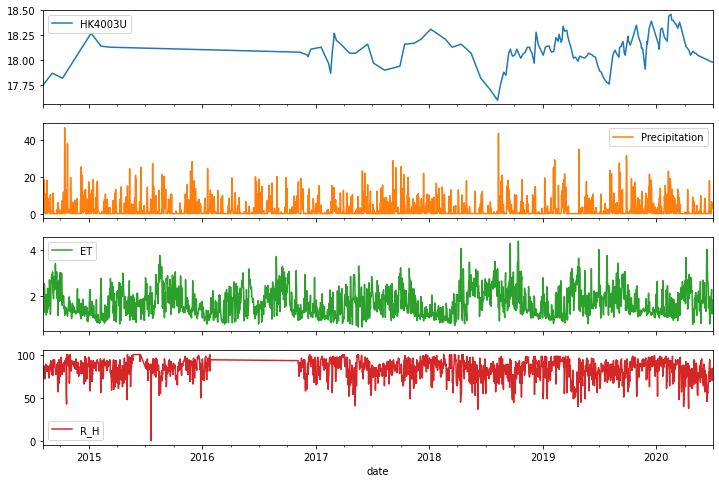

In [665]:
df.set_index('date')[['HK4003U','Precipitation','ET','R_H']].plot(subplots=True)

In [670]:
df_input =df[['HK4012H','Precipitation','ET','R_H','date']]
df_input= df.fillna({'ET':0})
df_input = df.isnull().sum()
df_input

date                0
R_H                 0
Precipitation       0
ET                  0
GW1428A           112
GW1430              0
GW285             224
HK4003U             0
HK4004U             0
HK4012H             0
HK4013H             0
HK4014H             0
HK4101U             0
HK4102U             0
HK4115U           120
HK4206U           547
HK4226B           852
HK4256U          1230
HK4258U          1190
HK4262U          1191
HK4302H          1651
SGU903074482      847
SGU909128423      971
SGU912799781     1211
SGU912799806     1189
SGU912799815     1189
SGU912799853     1211
dtype: int64

In [671]:
df_input =df[['HK4003U','Precipitation','ET','R_H']]
df_input

,HK4003U,Precipitation,ET,R_H
25,17.750000,0.0,2.336222,73.0
26,17.754000,9.5,2.145559,84.0
27,17.758000,0.0,2.212505,83.0
28,17.762000,7.1,2.045352,87.0
29,17.766000,18.4,2.539132,76.0
...,...,...,...,...
2176,17.984468,1.0,2.041947,72.0
2177,17.982979,6.5,2.279866,73.0
2178,17.981489,2.5,1.222635,82.0
2179,17.980000,5.5,1.808848,70.0


In [672]:
df_input.describe()

,HK4003U,Precipitation,ET,R_H
count,2156.000000,2156.000000,2156.000000,2156.000000
mean,18.084410,2.606818,1.727549,84.708952
std,0.132213,5.022237,0.607223,11.196039
min,17.600000,0.000000,0.000000,1.000000
25%,18.045675,0.000000,1.241450,79.000000
50%,18.101773,0.100000,1.624961,88.000000
75%,18.138875,2.900000,2.098680,93.270390
max,18.460000,46.800000,4.392801,100.000000


In [415]:
#df_input.query("Precipitation > 25")

In [673]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_input)


In [674]:
data_scaled

array([[0.1744186 , 0.        , 0.5318296 , 0.72727273],
       [0.17906977, 0.20299145, 0.48842622, 0.83838384],
       [0.18372093, 0.        , 0.50366618, 0.82828283],
       ...,
       [0.44359228, 0.0534188 , 0.27832691, 0.81818182],
       [0.44186047, 0.11752137, 0.41177555, 0.6969697 ],
       [0.44186047, 0.07051282, 0.28028738, 0.83838384]])

In [675]:
features=data_scaled[:]
target=data_scaled[:,0]

In [676]:
TimeseriesGenerator(features,target, length=2,sampling_rate=1, batch_size =1)[0]#length=2

(array([[[0.1744186 , 0.        , 0.5318296 , 0.72727273],
         [0.17906977, 0.20299145, 0.48842622, 0.83838384]]]),
 array([0.18372093]))

In [677]:
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.20,random_state=123,shuffle = False)
# shuffle = false , is important because it wont randomly shuffle with respect to time and training 80% of the data and not just 20%.

In [678]:
x_train.shape,x_test.shape

((1724, 4), (432, 4))

In [680]:
win_length = 60
batch_size = 10
num_features = 4
train_generator = TimeseriesGenerator(x_train,y_train,length=win_length,sampling_rate=1,batch_size=batch_size)#length=win_length
test_generator = TimeseriesGenerator(x_test,y_test,length=win_length,sampling_rate=1,batch_size=batch_size)#length=win_length

In [681]:
train_generator[0]

(array([[[0.1744186 , 0.        , 0.5318296 , 0.72727273],
         [0.17906977, 0.20299145, 0.48842622, 0.83838384],
         [0.18372093, 0.        , 0.50366618, 0.82828283],
         ...,
         [0.26638478, 0.00641026, 0.59034873, 0.94949495],
         [0.26462297, 0.        , 0.43340005, 0.90909091],
         [0.26286117, 0.        , 0.60387404, 0.96969697]],
 
        [[0.17906977, 0.20299145, 0.48842622, 0.83838384],
         [0.18372093, 0.        , 0.50366618, 0.82828283],
         [0.18837209, 0.1517094 , 0.46561444, 0.86868687],
         ...,
         [0.26462297, 0.        , 0.43340005, 0.90909091],
         [0.26286117, 0.        , 0.60387404, 0.96969697],
         [0.26109937, 0.        , 0.6828486 , 0.80808081]],
 
        [[0.18372093, 0.        , 0.50366618, 0.82828283],
         [0.18837209, 0.1517094 , 0.46561444, 0.86868687],
         [0.19302326, 0.39316239, 0.57802118, 0.75757576],
         ...,
         [0.26286117, 0.        , 0.60387404, 0.96969697],
        

In [682]:
test_generator[0]

(array([[[0.47674419, 0.        , 0.83043032, 0.87878788],
         [0.48837209, 0.74786325, 0.3157223 , 0.81818182],
         [0.5       , 0.08547009, 0.42109323, 0.95959596],
         ...,
         [0.46013289, 0.        , 0.48932702, 0.71717172],
         [0.44684385, 0.        , 0.38880402, 0.77777778],
         [0.43355482, 0.        , 0.41651378, 0.64646465]],
 
        [[0.48837209, 0.74786325, 0.3157223 , 0.81818182],
         [0.5       , 0.08547009, 0.42109323, 0.95959596],
         [0.51162791, 0.        , 0.73888599, 0.67676768],
         ...,
         [0.44684385, 0.        , 0.38880402, 0.77777778],
         [0.43355482, 0.        , 0.41651378, 0.64646465],
         [0.42026578, 0.        , 0.48221908, 0.55555556]],
 
        [[0.5       , 0.08547009, 0.42109323, 0.95959596],
         [0.51162791, 0.        , 0.73888599, 0.67676768],
         [0.51033592, 0.        , 0.66200113, 0.83838384],
         ...,
         [0.43355482, 0.        , 0.41651378, 0.64646465],
        

In [683]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128,input_shape=(win_length,num_features),return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.LSTM(128,return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(64,return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))

In [684]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_45 (LSTM)               (None, 60, 128)           68096     
_________________________________________________________________
leaky_re_lu_30 (LeakyReLU)   (None, 60, 128)           0         
_________________________________________________________________
lstm_46 (LSTM)               (None, 60, 128)           131584    
_________________________________________________________________
leaky_re_lu_31 (LeakyReLU)   (None, 60, 128)           0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 60, 128)           0         
_________________________________________________________________
lstm_47 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dropout_31 (Dropout)         (None, 64)              

In [685]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor ='val_loss',patience=2,mode='min')

model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics=[tf.metrics.MeanAbsoluteError()])

history = model.fit(train_generator,epochs=50,validation_data =test_generator,
                             shuffle=False, callbacks = [early_stopping])

Epoch 1/50
167/167 [==============================] - 58s 347ms/step - loss: 0.0158 - mean_absolute_error: 0.0960 - val_loss: 0.0345 - val_mean_absolute_error: 0.1495
Epoch 2/50
167/167 [==============================] - 20s 119ms/step - loss: 0.0262 - mean_absolute_error: 0.1206 - val_loss: 0.0314 - val_mean_absolute_error: 0.1445
Epoch 3/50
167/167 [==============================] - 20s 120ms/step - loss: 0.0281 - mean_absolute_error: 0.1283 - val_loss: 0.0350 - val_mean_absolute_error: 0.1530
Epoch 4/50
167/167 [==============================] - 19s 114ms/step - loss: 0.0214 - mean_absolute_error: 0.1122 - val_loss: 0.0274 - val_mean_absolute_error: 0.1357
Epoch 5/50
167/167 [==============================] - 20s 117ms/step - loss: 0.0140 - mean_absolute_error: 0.0914 - val_loss: 0.0229 - val_mean_absolute_error: 0.1240
Epoch 6/50
167/167 [==============================] - 20s 120ms/step - loss: 0.0098 - mean_absolute_error: 0.0771 - val_loss: 0.0169 - val_mean_absolute_error: 0.108

In [686]:
model.evaluate_generator(test_generator,verbose=0)

[0.011257078498601913, 0.09271145612001419]

In [687]:

predictions=model.predict_generator(test_generator) # we can use train generator also to check predictions for the training set. 

In [688]:
predictions.shape[0]

372

In [689]:
predictions

array([[0.5946218 ],
       [0.5876699 ],
       [0.57993877],
       [0.56999993],
       [0.5589708 ],
       [0.5460421 ],
       [0.52513057],
       [0.5053717 ],
       [0.48982394],
       [0.47874898],
       [0.47680017],
       [0.47730497],
       [0.48830128],
       [0.50289404],
       [0.50532717],
       [0.49586952],
       [0.47871614],
       [0.4586227 ],
       [0.44015953],
       [0.4247492 ],
       [0.4142925 ],
       [0.40913612],
       [0.40333745],
       [0.39675993],
       [0.3900112 ],
       [0.38564956],
       [0.38650507],
       [0.3877162 ],
       [0.38960338],
       [0.3878637 ],
       [0.38100463],
       [0.36951   ],
       [0.35575292],
       [0.3431296 ],
       [0.33987528],
       [0.34223455],
       [0.349061  ],
       [0.35954803],
       [0.36485684],
       [0.36325026],
       [0.3604834 ],
       [0.36416474],
       [0.38792658],
       [0.42070204],
       [0.45582318],
       [0.48241514],
       [0.51095736],
       [0.546

In [690]:
predictions

array([[0.5946218 ],
       [0.5876699 ],
       [0.57993877],
       [0.56999993],
       [0.5589708 ],
       [0.5460421 ],
       [0.52513057],
       [0.5053717 ],
       [0.48982394],
       [0.47874898],
       [0.47680017],
       [0.47730497],
       [0.48830128],
       [0.50289404],
       [0.50532717],
       [0.49586952],
       [0.47871614],
       [0.4586227 ],
       [0.44015953],
       [0.4247492 ],
       [0.4142925 ],
       [0.40913612],
       [0.40333745],
       [0.39675993],
       [0.3900112 ],
       [0.38564956],
       [0.38650507],
       [0.3877162 ],
       [0.38960338],
       [0.3878637 ],
       [0.38100463],
       [0.36951   ],
       [0.35575292],
       [0.3431296 ],
       [0.33987528],
       [0.34223455],
       [0.349061  ],
       [0.35954803],
       [0.36485684],
       [0.36325026],
       [0.3604834 ],
       [0.36416474],
       [0.38792658],
       [0.42070204],
       [0.45582318],
       [0.48241514],
       [0.51095736],
       [0.546

In [691]:
y_test


array([0.47674419, 0.48837209, 0.5       , 0.51162791, 0.51033592,
       0.50904393, 0.50775194, 0.50645995, 0.50516796, 0.50387597,
       0.50258398, 0.50129199, 0.5       , 0.49833887, 0.49667774,
       0.49501661, 0.49335548, 0.49169435, 0.49003322, 0.48837209,
       0.49169435, 0.49501661, 0.49833887, 0.50166113, 0.50498339,
       0.50830565, 0.51162791, 0.51744186, 0.52325581, 0.52906977,
       0.53488372, 0.54069767, 0.54651163, 0.5448505 , 0.54318937,
       0.54152824, 0.53986711, 0.53820598, 0.53654485, 0.53488372,
       0.53294574, 0.53100775, 0.52906977, 0.52713178, 0.5251938 ,
       0.52325581, 0.51744186, 0.51162791, 0.50996678, 0.50830565,
       0.50664452, 0.50498339, 0.50332226, 0.50166113, 0.5       ,
       0.48671096, 0.47342193, 0.46013289, 0.44684385, 0.43355482,
       0.42026578, 0.40697674, 0.39700997, 0.38704319, 0.37707641,
       0.36710963, 0.35714286, 0.34717608, 0.3372093 , 0.33488372,
       0.33255814, 0.33023256, 0.32790698, 0.3255814 , 0.31395

In [692]:
x_test

array([[0.47674419, 0.        , 0.83043032, 0.87878788],
       [0.48837209, 0.74786325, 0.3157223 , 0.81818182],
       [0.5       , 0.08547009, 0.42109323, 0.95959596],
       ...,
       [0.44359228, 0.0534188 , 0.27832691, 0.81818182],
       [0.44186047, 0.11752137, 0.41177555, 0.6969697 ],
       [0.44186047, 0.07051282, 0.28028738, 0.83838384]])

In [693]:
x_test[:,1:][win_length:]

array([[0.        , 0.48221908, 0.55555556],
       [0.        , 0.43431622, 0.7979798 ],
       [0.        , 0.4921328 , 0.80808081],
       ...,
       [0.0534188 , 0.27832691, 0.81818182],
       [0.11752137, 0.41177555, 0.6969697 ],
       [0.07051282, 0.28028738, 0.83838384]])

In [694]:
df_pred=pd.concat([pd.DataFrame(predictions),pd.DataFrame(x_test[:,1:][win_length:])],axis=1)

In [695]:
df_pred

,0,0,1,2
0,0.594622,0.000000,0.482219,0.555556
1,0.587670,0.000000,0.434316,0.797980
2,0.579939,0.000000,0.492133,0.808081
3,0.570000,0.000000,0.444624,0.777778
4,0.558971,0.000000,0.492621,0.848485
...,...,...,...,...
367,0.589936,0.021368,0.464839,0.717172
368,0.584787,0.138889,0.519000,0.727273
369,0.583602,0.053419,0.278327,0.818182
370,0.587196,0.117521,0.411776,0.696970


In [696]:
rev_trans=scaler.inverse_transform(df_pred)

In [697]:
rev_trans

array([[18.11137473,  0.        ,  2.11829265, 56.        ],
       [18.10539612,  0.        ,  1.90786486, 80.        ],
       [18.09874734,  0.        ,  2.16184164, 81.        ],
       ...,
       [18.10189758,  2.5       ,  1.22263484, 82.        ],
       [18.10498835,  5.5       ,  1.80884821, 70.        ],
       [18.10915117,  3.3       ,  1.23124678, 84.        ]])

In [698]:
df_final=(df_input[predictions.shape[0]*-1:])

In [699]:
df_final.count()

HK4003U          372
Precipitation    372
ET               372
R_H              372
dtype: int64

In [700]:
df_final['HK4003U_pred']=rev_trans[:,0]


<ipython-input-700-9e8403b4376a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['HK4003U_pred']=rev_trans[:,0]


In [701]:
df_final
df_final.to_csv("Copythecsv.csv")

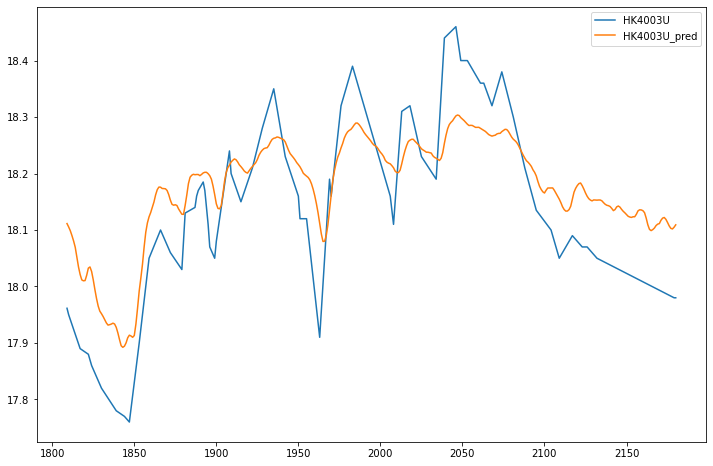

In [703]:
df_final[['HK4003U','HK4003U_pred']].plot()
plt.savefig("HK4003U','HK4003U_pred(with RH).png")